### Plotting Method 

####  Plotting Method HARDCODED for regularization exp.

In [1]:
"""Plotting Validation Accuracies for REGULARIZATION METHODS"""

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.5)
plt.style.use('ggplot')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

def plot_for_model(acc_val, num_epochs, legend_names, exp_name, save = True,\
                  file_name = ["a.pdf"]):
    
    # Create Figures
    fig_acc= plt.figure()
    ax_acc = fig_acc.add_subplot(111)
    
    #Plot Data    
    no_models = acc_val.shape[0] # Number of models        
    epochs_vect = np.arange(1, num_epochs+1)#X-axis vector
    
    lw = 3 # line width
    ls = '-'
    for i in range(no_models):
        if "0.01" in legend_names[i]:             
            if "D=0" in legend_names[i]: c='violet'
            elif "D=1" in legend_names[i]: c='darkorchid'
            elif "D=2" in legend_names[i]: c='pink'
                
        elif "0.001" in legend_names[i]:             
            if "D=0" in legend_names[i]: c='darkcyan'
            elif "D=1" in legend_names[i]: c='midnightblue'
            elif "D=2" in legend_names[i]: c='dodgerblue'
                
        elif "0.0001" in legend_names[i]:             
            if "D=0" in legend_names[i]: c='mediumseagreen'
            elif "D=1" in legend_names[i]: c='lime'
            elif "D=2" in legend_names[i]: c='forestgreen'
                
        if i == len(legend_names)-1:
            c='gold'
            ax_acc.plot(epochs_vect, acc_val[i,:],lw=lw, c=c, ls=ls)

        else:
            ax_acc.plot(epochs_vect, acc_val[i,:], label = legend_names[i], lw=lw, c=c, ls=ls)

    # Configure Axis Properties
    lfont = 13
    ax_acc.legend(loc=0, prop={'size':lfont}, ncol = 3, fancybox=True, shadow=True)
    ax_acc.set_xlabel('Epoch number',fontsize=20 )
    ax_acc.set_ylabel('Accuracy', fontsize=20)
    ax_acc.set_title("Validation Accuracy - {}".format(exp_name),fontsize=27)#, fontweight='bold')
    ax_acc.tick_params(labelsize=15)
#     ax_acc.set_yscale("log")
        
        
    if(save): # Save figures
        fig_acc.tight_layout()
        fig_acc.savefig(file_name[0]) 

#### Normal Plotting Method 

In [14]:
"""Plotting Data for Different Experiments"""

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.style.use('ggplot')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

def plot_for_model(y_data, x_max, x_step, legend_names, exp_name, save = True,\
                   file_name = "a.pdf", legend_filter=[""]):
    """
    Function that plots data for multiple experiments
    Args:
        y_data (numpy): Matrix containing each experiments data. Each row is an
                        individual experiment and each column is data point
        x_max (float): Maximum value of the x-axis (max x- ticks)
        x_step (float): size of steps for the x-axis
        legend_names (list): list of strings containing the name of each experiment
        
        Optional:
        save (boolean): determines if plot is saved as PDF file
        file_name (string): name of PDF to save plot to
    
    Outputs:
        No output, Plot is saved as PDF file if save == True
    """
    # Create Figures
    fig_acc= plt.figure()
    ax_acc = fig_acc.add_subplot(111)
    
    # Get y and x data    
    no_models = y_data.shape[0] # Number of models / experiments         
    x_data = np.arange(x_step, x_max+1, x_step) 
    
    # Plot Data
    lw = 3 # line width
    ls = '-'
    for i in range(no_models):
        if legend_filter[0] in legend_names[i] or not legend_filter:
            ax_acc.plot(x_data, y_data[i,:], label = legend_names[i], lw=lw, ls=ls)


    # Configure Axis Propertiesa
    lfont = 16
    ax_acc.legend(loc=4, prop={'size':lfont}, ncol = 1, fancybox=True, shadow=True)
    ax_acc.set_xlabel('Episode',fontsize=20 )
    ax_acc.set_ylabel('Mean Reward', fontsize=20)
    ax_acc.set_title("{}".format(exp_name),fontsize=27)#, fontweight='bold')
    ax_acc.tick_params(labelsize=15)
#     ax_acc.set_yscale("log")
        
    
    if(save): # Save figures
        fig_acc.tight_layout()
        fig_acc.savefig(file_name) 
        
    return ax_acc

In [613]:

"""Plotting Data for Different Experiments"""

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.style.use('ggplot')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

def plot_for_model_diff_bathches(y_data, num_rows_all, x_max, x_steps, legend_names, exp_name,\
                             save = True, file_name = "a.pdf", legend_filter=[""]):
    """
    Function that plots data for multiple experiments
    Args:
        y_data (numpy): Matrix containing each experiments data. Each row is an
                        individual experiment and each column is data point
        x_max (float): Maximum value of the x-axis (max x- ticks)
        x_step (float): size of steps for the x-axis
        legend_names (list): list of strings containing the name of each experiment
        
        Optional:
        save (boolean): determines if plot is saved as PDF file
        file_name (string): name of PDF to save plot to
    
    Outputs:
        No output, Plot is saved as PDF file if save == True
    """
    # Create Figures
    fig_acc= plt.figure()
    ax_acc = fig_acc.add_subplot(111)
    
    # Get y and x data    
    no_models = y_data.shape[0] # Number of models / experiments
    x_data_all = []
    for x_step in x_steps:
        x_data_all.append(np.arange(x_step, x_max+1, x_step)) 

    
    
    # Plot Data
    lw = 3 # line width
    ls = '-'
    for i in range(no_models):
        if legend_filter[0] in legend_names[i] or not legend_filter or legend_filter[0] == "All":
            ax_acc.plot(x_data_all[i], y_data[i,0:num_rows_all[i]], label = legend_names[i], lw=lw, ls=ls)


    # Configure Axis Propertiesa
    lfont = 16
    ax_acc.legend(loc=4, prop={'size':lfont}, ncol = 1, fancybox=True, shadow=True)
    ax_acc.set_xlabel('Episode',fontsize=20 )
    ax_acc.set_ylabel('Mean Reward', fontsize=20)
    ax_acc.set_title("{}".format(exp_name),fontsize=27)#, fontweight='bold')
    ax_acc.tick_params(labelsize=15)
#     ax_acc.set_yscale("log")
        
        
    if(save): # Save figures
        fig_acc.tight_layout()
        fig_acc.savefig(file_name) 

### Plot Experiments

#### Imports and Useful Code 

In [15]:
import numpy as np
import pandas as pd
import os
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# is_filtered = ""
# is_filtered = " (Smoothed)"

# exp_name = task_name + " - Varying Depth" + is_filtered

# # Smoothing signal
# if is_filtered:
#     from scipy.signal import savgol_filter
#     mean_R = savgol_filter(mean_R, 35 , 4)  

### Bipedal Experiments 

#### **Plot multiple logs for STL Experiment (singles logs in single date_time folder)**

PPO_MTL/log-files/BipedalWalker-v2/PPO_loss_sdl/0.0, 
['1' '2' '3' '4' '5' '6']
['log_Wind_0.0.csv', 'log_PPO_loss_sdl_0.0.csv', 'log_Wind_0.0.csv', 'log_PPO_loss_sdl_0.0.csv', 'log_PPO_loss_sdl_0.0.csv', 'log_PPO_loss_sdl_0.0.csv']
[12080, 20000, 6000, 20000, 20000, 20000]
['KL_3', 'clip_3', 'KL_7', 'clip_7', 'both_7', 'both_3']


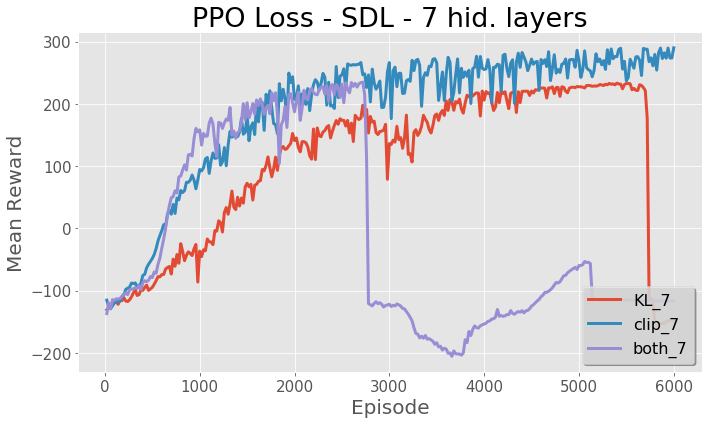

In [18]:
# Configure which experiment
# STL kl vs clip vs both for 3 vs 7

env_name = "BipedalWalker-v2"
task_name = "PPO_loss_sdl"
task_params = [0.0]
task_params_str = ''.join(str(e) +', ' for e in task_params)
date_time = "CORRECTED"
path = "PPO_MTL/log-files/{}/{}/{}".format(env_name, task_name,  task_params_str)
print(path)

# Read log files
log_type = "log" 
# log_type = "aux"
dir_names = np.sort(os.listdir(path))
print(dir_names)
log_files = [os.listdir(os.path.join(path, dir_name)) for dir_name in dir_names]
log_files = sum(log_files, []) # joint list of lists into single list
log_files = [file_name for file_name in log_files if "lock" not in file_name and log_type in file_name]
print(log_files)

df_tot = []
for dir_,log in zip(dir_names, log_files):
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, dir_, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, dir_, log), delim_whitespace=True))
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
batch_size = df_tot[0]['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size
print(num_episodes_tot)

# Configure plotting method
task_name = "PPO Loss"
task_params = ["KL_3", "clip_3","KL_7", "clip_7", "both_7", "both_3"]
task_params_str = ''.join(str(e) +', ' for e in task_params)
legend_names = [str(task) for task in task_params]
print(legend_names)

legend_filter = ["7"]
# legend_filter = [""]
exp_name = task_name + " - SDL - " + "{} hid. layers".format(legend_filter[0]) 
file_name = "PPO_MTL/plots/PPO Loss/{}_{}_{}.pdf".format(env_name, exp_name, date_time)
save = True


# Plot Data
mean_R = np.zeros((num_exp, num_rows))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]

plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save, legend_filter=legend_filter)

In [23]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.max(mean_R, axis=1))

(6, 300)
200
['KL_3', 'clip_3', 'KL_7', 'clip_7', 'both_7', 'both_3']
[ 272.65768   253.0013   -151.513412  278.009    -116.4966    272.6379  ]
[ 274.25574  292.456    233.13742  289.901    234.823    278.989  ]


In [ ]:
-151.513

In [24]:
(272.657+234.478)/2

253.5675

In [26]:
(253.001+278.009)/2

265.505

In [25]:
(-116.496+272.637)/2

78.07050000000001

PPO_MTL/log-files/BipedalWalker-v2/stl_t1/1.0, 
['Jul-24_22:09:08' 'Jul-24_22:10:20' 'Jul-24_22:12:23']
['aux_stl_t1_1.0.txt', 'aux_stl_t1_1.0.txt', 'aux_stl_t1_1.0.txt']
[12510, 11985, 19210]
['3 hid', '5 hid', '7 hid']
(3, 2397)


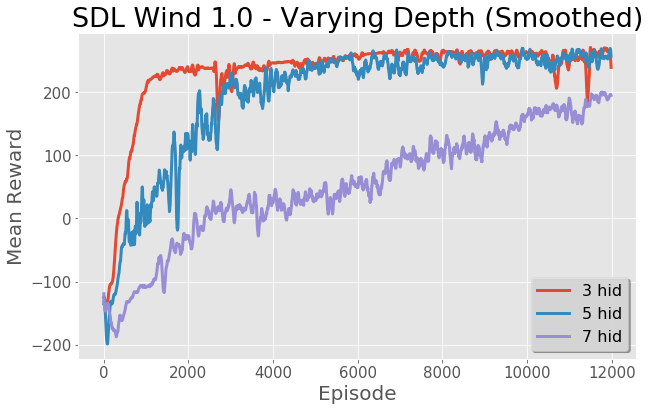

In [11]:
# Configure which experiment
# STL Wind=0 or 1 or 2 for 3 vs 5 vs 7

env_name = "BipedalWalker-v2"
task_name = "stl_t0"
task_params = [0.0]
task_name = "stl_t1"
task_params = [1.0]
# task_name = "stl_t2"
# task_params = [2.0]

is_filtered = ""
is_filtered = " (Smoothed)"
task_params_str = ''.join(str(e) +', ' for e in task_params)
date_time = "Jul-24_xx:xx:xx"
path = "PPO_MTL/log-files/{}/{}/{}".format(env_name, task_name,  task_params_str)
print(path)

# Read log files
log_type = "aux" 
# log_type = "aux"
dir_names = np.sort(os.listdir(path))
print(dir_names)
log_files = [os.listdir(os.path.join(path, dir_name)) for dir_name in dir_names]
log_files = sum(log_files, []) # joint list of lists into single list
log_files = [file_name for file_name in log_files if "lock" not in file_name and log_type in file_name]
print(log_files)

df_tot = []
for dir_,log in zip(dir_names, log_files):
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, dir_, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, dir_, log), delim_whitespace=True))
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
# min_num_episodes = 10000
batch_size = df_tot[0]['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size
print(num_episodes_tot)

# Configure plotting method
task_name = "SDL Wind {}".format(task_params[0])
legend_names = ["3 hid", "5 hid","7 hid"]
print(legend_names)
exp_name = task_name + " - Varying Depth" + is_filtered
file_name = "PPO_MTL/plots/SDL Wind/{}_{}.pdf".format(env_name, exp_name)
save = False


# Plot Data
mean_R = np.zeros((num_exp, num_rows))
print(mean_R.shape)
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]

# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    mean_R = savgol_filter(mean_R, 35 , 4)  

plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)

In [12]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.max(mean_R, axis=1))

(3, 2397)
50
['3 hid', '5 hid', '7 hid']
[ 256.95263886  265.18980907  194.99006282]
[ 270.4799512   269.22505746  200.11947617]


#### **Plot multiple logs for STL CASCADE (singles logs in single date_time folder)**

PPO_MTL/log-files/BipedalWalker-v2/sdl_t0_casc/0.0, 
['Aug-22_00:33:29' 'Aug-22_00:43:04']
['aux_sdl_t0_casc_0.0.txt', 'aux_sdl_t0_casc_0.0.txt']
[20000, 20000]
['125-50-25', '125-50-125']
(2, 600)


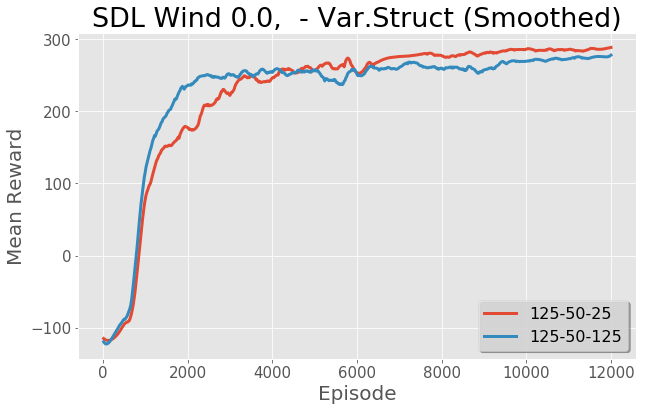

In [16]:
# Configure which experiment
# STL Wind=0 or 1 or 2 for 3 vs 5 vs 7

env_name = "BipedalWalker-v2"

task_name = "sdl_t0_casc"
task_params = [0.0]
# task_name = "sdl_t1_casc"
# task_params = [1.0]
# task_name = "sdl_t2_casc"
# task_params = [2.0]

is_filtered = ""
is_filtered = " (Smoothed)"
task_params_str = ''.join(str(e) +', ' for e in task_params)
path = "PPO_MTL/log-files/{}/{}/{}".format(env_name, task_name,  task_params_str)
print(path)

# Read log files
log_type = "aux" 
# log_type = "aux"
dir_names = np.sort(os.listdir(path))
print(dir_names)
log_files = [os.listdir(os.path.join(path, dir_name)) for dir_name in dir_names]
log_files = sum(log_files, []) # joint list of lists into single list
log_files = [file_name for file_name in log_files if "lock" not in file_name and log_type in file_name]
print(log_files)

df_tot = []
for dir_,log in zip(dir_names, log_files):
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, dir_, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, dir_, log), delim_whitespace=True))
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
min_num_episodes = 12000
batch_size = df_tot[0]['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size
print(num_episodes_tot)

# Configure plotting method
task_name = "SDL Wind {}".format(task_params_str)
legend_names = ["125-50-25", "125-50-125"]
print(legend_names)
exp_name = task_name + " - Var.Struct" + is_filtered
file_name = "PPO_MTL/plots/SDL Cascade/{}_{}.pdf".format(env_name, exp_name)
save =  False

# Plot Data
mean_R = np.zeros((num_exp, num_rows))
print(mean_R.shape)
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]

# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    mean_R = savgol_filter(mean_R, 35 , 4)  

plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)

In [745]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.max(mean_R, axis=1))

(2, 600)
200
['125-50-25', '125-50-125']
[ 287.46001236  275.96155158]
[ 288.50747241  277.88694093]


In [738]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.max(mean_R, axis=1))

(2, 1000)
200
['125-50-25', '125-50-125']
[ 278.84071789  282.00578319]
[ 279.72388231  285.18516326]


#### **Plot multiple logs for MTL Experiment (multiple logs in single date_time folder)**

PPO_MTL/log-files/BipedalWalker-v2/PPO_loss_mtl/0.0, 1.0, 2.0, /Jul-25_13:21:57
['aux_PPO_loss_mtl_0.0.txt' 'aux_PPO_loss_mtl_1.0.txt'
 'aux_PPO_loss_mtl_2.0.txt']
[5780, 5780, 5780]
['Wind 0', 'Wind 1', 'Wind 2']


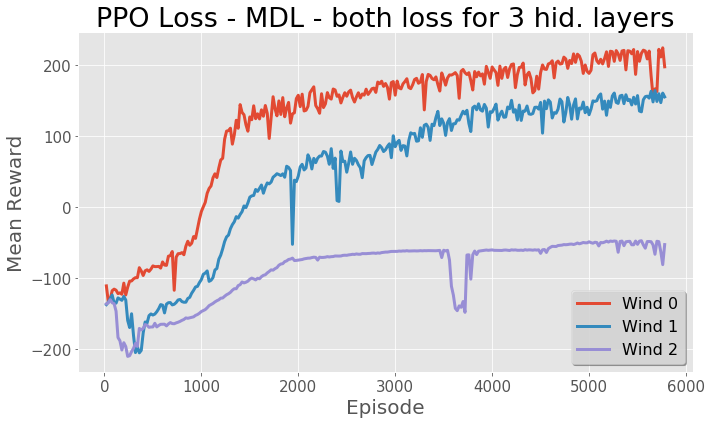

In [5]:
# Configure which experiment
# MTL kl or clip or both for 3 or 7 individually plotting each 0,1,2

env_name = "BipedalWalker-v2"
task_name = "PPO_loss_mtl"
task_params = [0.0, 1.0, 2.0]
task_params_str = ''.join(str(e) +', ' for e in task_params)
date_time = "Jul-25_13:21:57"
loss_type = "both"
num_hid = 3

# # KL 7, Clip 7, Both 7
# dates_times = ["Jul-23_17:37:21","Jul-23_22:53:05","Jul-24_16:21:22"]

# # KL 3, Clip 3, Both 3
# dates_times = ["Jul-24_18:56:22", "Jul-24_19:57:16", "Jul-25_13:21:57"]

path = "PPO_MTL/log-files/{}/{}/{}/{}".format(env_name, task_name,  task_params_str, date_time)
print(path)

# Read log files
# log_type = "log"
log_type = "aux"
log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
log_files = np.sort(log_files)
print(log_files)

df_tot = []
for log in log_files:
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))
    
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
batch_size = df_tot[0]['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size    
print(num_episodes_tot)

# Configure plotting method
task_name = "PPO Loss"
legend_names = ["Wind 0", "Wind 1","Wind 2"]
print(legend_names)

exp_name = task_name + " - MDL - " + "{} loss for {} hid. layers".format(loss_type, num_hid) 
file_name = "PPO_MTL/plots/PPO Loss/MDL individual 0,1,2, Plots/{}_{}_{}.pdf".format(env_name, exp_name, date_time)
save = True


# Plot Data
mean_R = np.zeros((num_exp, num_rows))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]

plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)


['PPO_MTL/log-files/BipedalWalker-v2/PPO_loss_mdl/0.0, 1.0, 2.0, /1', 'PPO_MTL/log-files/BipedalWalker-v2/PPO_loss_mdl/0.0, 1.0, 2.0, /2', 'PPO_MTL/log-files/BipedalWalker-v2/PPO_loss_mdl/0.0, 1.0, 2.0, /3']
['aux_PPO_loss_mtl_0.0.txt' 'aux_PPO_loss_mtl_1.0.txt'
 'aux_PPO_loss_mtl_2.0.txt']
['aux_PPO_loss_mdl_0.0.txt' 'aux_PPO_loss_mdl_1.0.txt'
 'aux_PPO_loss_mdl_2.0.txt']
['aux_PPO_loss_mdl_0.0.txt' 'aux_PPO_loss_mdl_1.0.txt'
 'aux_PPO_loss_mdl_2.0.txt']
[5720, 11360, 10700]
5720
['KL (Avg)', 'clip (Avg)', 'both (Avg)']
5720


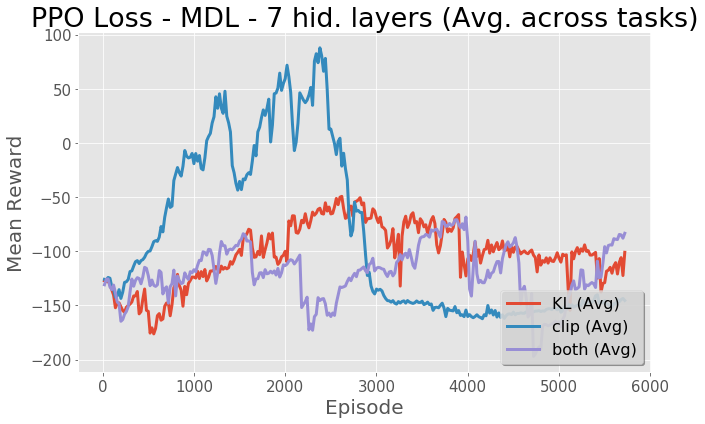

In [8]:
# Configure which experiment
# MTL kl vs clip vs both for 3 or 7 AVERAGING across tasks 0,1,2

env_name = "BipedalWalker-v2"
# task_name = "PPO_loss_mtl"
task_name = "PPO_loss_mdl"
task_params = [0.0, 1.0, 2.0]
task_params_str = ''.join(str(e) +', ' for e in task_params)

# KL 7, Clip 7, Both 7
# dates_times = ["Jul-23_17:37:21","Jul-23_22:53:05","Jul-24_16:21:22"]
dates_times = ["1","2","3"]
# KL 3, Clip 3, Both 3
# dates_times = ["Jul-24_18:56:22", "Jul-24_19:57:16", "Jul-25_13:21:57"]
# dates_times = ["10","20","30"]

paths = []
for date_time in dates_times:
    paths.append("PPO_MTL/log-files/{}/{}/{}/{}".format(env_name, task_name,  task_params_str, date_time))
print(paths)

# Read log files
mean_R_all = []
min_num_episodes_all = []
batch_size_all = []
# log_type = "log"
log_type = "aux"
                 
for i,path in enumerate(paths):           
    
    log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
    log_files = np.sort(log_files)
    print(log_files)

    df_tot = []
    for log in log_files:
        if log_type == "log":
            df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
        else:# if using auxiliary logs
            df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))

    # Get experiments properties
    num_exp = len(df_tot)
    num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
    min_num_episodes_all.append(min(num_episodes_tot))
    batch_size_all.append(df_tot[0]['_Episode'].as_matrix()[0])
    num_rows = min_num_episodes_all[i] // batch_size_all[i] 
    
    # Plot Data
    mean_R = np.zeros((num_exp, num_rows))
    for i,df in enumerate(df_tot):
        mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]
    
    mean_R_all.append(np.mean(mean_R, axis = 0))
               

# Get experiments properties
num_exp = len(mean_R_all)
min_num_episodes = min(min_num_episodes_all)
batch_size = min(batch_size_all)
num_rows = min_num_episodes // batch_size 
print(min_num_episodes_all)
print(min_num_episodes)

# Configure plotting method
task_name = "PPO Loss"
legend_names = ["KL (Avg)", "clip (Avg)", "both (Avg)"]
print(legend_names)

exp_name = task_name + " - MDL - " + "7 hid. layers (Avg. across tasks)" 
# exp_name = task_name + " - MDL - " + "3 hid. layers (Avg. across tasks)" 
file_name = "PPO_MTL/plots/PPO Loss/{}_{}_{}_CORRECTED.pdf".format(env_name, exp_name, date_time) 
save = True

# Plot Data
mean_R = np.zeros((num_exp, num_rows))
for i in range(len(mean_R_all)):
    mean_R[i,:] = mean_R_all[i][0:num_rows]
    
print(mean_R.shape[1]*20)
plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)

In [9]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.max(mean_R, axis=1))

(3, 286)
200
['KL (Avg)', 'clip (Avg)', 'both (Avg)']
[-113.73654467 -147.38956667  -89.052723  ]
[-49.3175      87.8396     -68.45606667]


In [10]:
(227.807-113.736)/2

57.03549999999999

In [11]:
(-121.153-147.389)/2

-134.27100000000002

In [12]:
(-78.613-68.456)/2

-73.53450000000001

PPO_MTL/log-files/BipedalWalker-v2/mtl_t012/0.0, 1.0, 2.0, /Jul-25_16:26:33
['aux_mtl_t012_0.0.txt' 'aux_mtl_t012_1.0.txt' 'aux_mtl_t012_2.0.txt']
[20000, 20000, 20000]
['Wind 0', 'Wind 1', 'Wind 2']


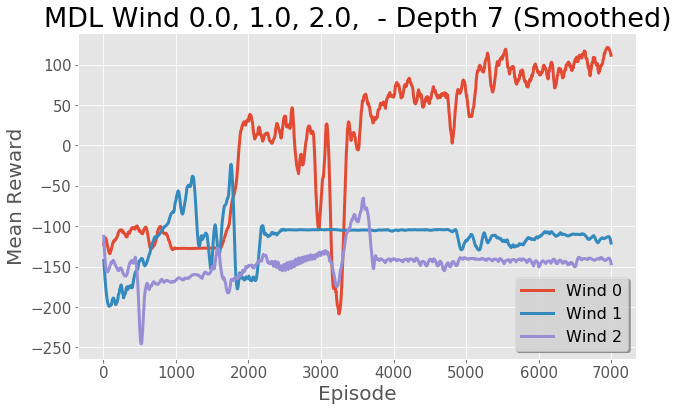

In [146]:
# Configure which experiment
# MTL 3 or 5 or 7 individually plotting each 0,1,2 (EXPERIMETNS WITH BATCH=5)

env_name = "BipedalWalker-v2"
task_name = "mtl_t012"
task_params = [0.0, 1.0, 2.0]
task_params_str = ''.join(str(e) +', ' for e in task_params)

# Depth 5, Depth 3, Depth 7
# ["Jul-25_14:17:58", "Jul-25_14:44:59","Jul-25_16:26:33"]
# depth = 5
# date_time = "Jul-25_14:17:58"
# depth = 3
# date_time = "Jul-25_14:44:59"
depth = 7
date_time ="Jul-25_16:26:33"

is_filtered = ""
is_filtered = " (Smoothed)"

path = "PPO_MTL/log-files/{}/{}/{}/{}".format(env_name, task_name,  task_params_str, date_time)
print(path)

# Read log files
# log_type = "log"
log_type = "aux"
log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
log_files = np.sort(log_files)
print(log_files)

df_tot = []
for log in log_files:
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))
    
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
min_num_episodes = 7000
batch_size = df_tot[0]['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size    
print(num_episodes_tot)

# Configure plotting method
task_name = "MDL Wind {}".format(task_params_str) 
legend_names = ["Wind 0", "Wind 1","Wind 2"]
print(legend_names)
exp_name = task_name + " - Depth {}".format(depth) + is_filtered
file_name = "PPO_MTL/plots/MDL Wind/{}_{}_{}.pdf".format(env_name, exp_name, date_time)
save = False


# Plot Data
# num_exp +=1
mean_R = np.zeros((num_exp, num_rows))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]


# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    mean_R = savgol_filter(mean_R, 35 , 4)  
    
# # Mean Performance across domains
# mean_R[-1,:] = np.mean(mean_R, axis=0)
# legend_names.append("Mean")

ax_acc = plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)


In [147]:
# Compute Avg. Perofrmance on Last n- episodes
n = 100
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.mean(np.mean(mean_R[:, -1:-n-1:-1], axis=1)))

(3, 1400)
500
['Wind 0', 'Wind 1', 'Wind 2']
[ 106.47885616 -113.6832661  -140.91890471]
-49.3744382181


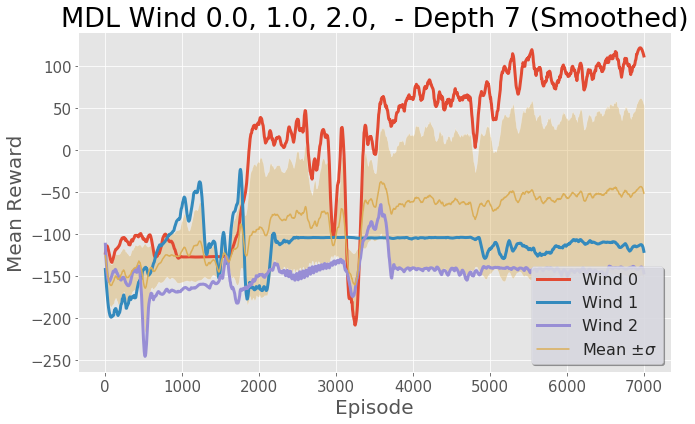

In [148]:
# add mean across all tasks + std*confidence_interval
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data
ax_acc = plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)
ax = ax_acc
x_data = np.arange(batch_size, min_num_episodes+1, batch_size) 
mean_of_mean_R = np.mean(mean_R, axis=0)
ci = 0.90 #confidence interval
std = np.std(mean_R, axis=0)*ci


# Plot Config
save = True
lfont = 16
clrs = sns.color_palette("hls", 10)
i = 1
with sns.axes_style("darkgrid"):    
    ax.plot(x_data, mean_of_mean_R, label= "Mean $\pm \sigma$", c=clrs[i],)
    ax.legend(loc=4, prop={'size':lfont}, ncol = 1, fancybox=True, shadow=True)
    ax.fill_between(x_data, mean_of_mean_R - std, mean_of_mean_R + std , alpha=0.4, facecolor=clrs[i])    
    
fig_acc = ax.get_figure()
if(save): # Save figures
    fig_acc.tight_layout()
    fig_acc.savefig(file_name) 

PPO_MTL/log-files_with_lunar/BipedalWalker-v2/mdl_t012/0.0, 1.0, 2.0, /Aug-04_23:47:53
['aux_mdl_t012_0.0.txt' 'aux_mdl_t012_1.0.txt' 'aux_mdl_t012_2.0.txt']
[25200, 25200, 25200]
['Wind 0', 'Wind 1', 'Wind 2']


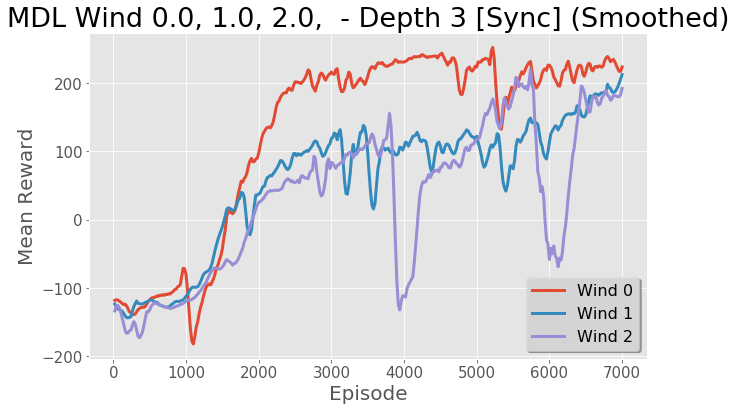

In [624]:
##### Configure which experiment
# MTL 3 or 5 or 7 individually plotting each 0,1,2 (EXPERIMETNS WITH BATCH=20)

env_name = "BipedalWalker-v2"
task_name = "mdl_t012"
task_params = [0.0, 1.0, 2.0]
task_params_str = ''.join(str(e) +', ' for e in task_params)

# Depth 3, Depth 5 [3-2], Depth 5 [2-3], Depth 3 [Async]
depth = "3 [Sync]" 
date_time = "Aug-04_23:47:53"

# depth = "5"
# date_time = "Aug-05_04:02:16"

# depth = "5 [2-3]"
# date_time = "Aug-05_04:50:36"

# depth = "3 [Async]"
# date_time = "Aug-05_04:48:41"

is_filtered = ""
is_filtered = " (Smoothed)"

path = "PPO_MTL/log-files_with_lunar/{}/{}/{}/{}".format(env_name, task_name,  task_params_str, date_time)
print(path)

# Read log files
# log_type = "log"
log_type = "aux"
log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
log_files = np.sort(log_files)
print(log_files)

df_tot = []
for log in log_files:
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))
    
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
min_num_episodes = 7000
batch_size = df_tot[0]['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size    
print(num_episodes_tot)

# Configure plotting method
task_name = "MDL Wind {}".format(task_params_str) 
legend_names = ["Wind 0", "Wind 1","Wind 2"]
print(legend_names)
exp_name = task_name + " - Depth {}".format(depth) + is_filtered
file_name = "PPO_MTL/plots/MDL Wind/{}_{}_{}.pdf".format(env_name, exp_name, date_time)
save = False


# Plot Data
# num_exp +=1
mean_R = np.zeros((num_exp, num_rows))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]


# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    mean_R = savgol_filter(mean_R, 13 , 4)  

ax_acc = plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)


Sync @ 6950
['Wind 0', 'Wind 1', 'Wind 2']
[ 233.76004692  189.4855176   183.67247467]
202.306013061

Async @ 7000
['Wind 0', 'Wind 1', 'Wind 2']
[ 142.91994572  201.98465443    8.9260228 ]
117.943540983

Sync @ 25200
['Wind 0', 'Wind 1', 'Wind 2']
[ 229.04590702  122.85423593  228.41574464]
193.438629195

Async @ 17000
['Wind 0', 'Wind 1', 'Wind 2']
[ 254.23450646  231.4638548   131.79361898]
205.83066008

In [233]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.mean(np.mean(mean_R[:, -1:-n-1:-1], axis=1)))

(3, 350)
200
['Wind 0', 'Wind 1', 'Wind 2']
[ 142.91994572  201.98465443    8.9260228 ]
117.943540983


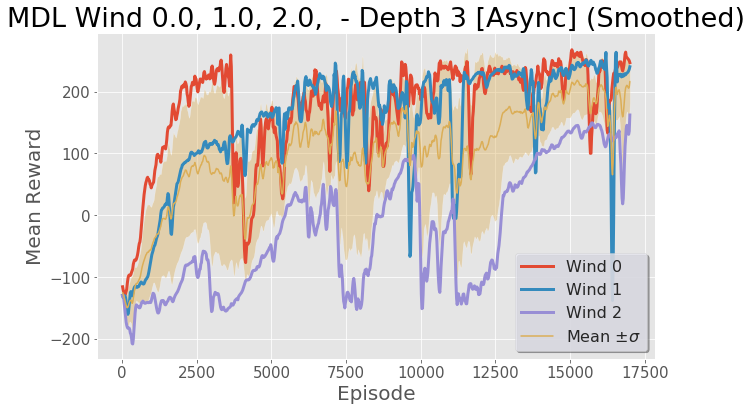

In [176]:
# add mean across all tasks + std*confidence_interval
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data
ax_acc = plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)
ax = ax_acc
x_data = np.arange(batch_size, min_num_episodes+1, batch_size) 
mean_of_mean_R = np.mean(mean_R, axis=0)
ci = 0.90 #confidence interval
std = np.std(mean_R, axis=0)*ci


# Plot Config
save = False
lfont = 16
clrs = sns.color_palette("hls", 10)
i = 1
with sns.axes_style("darkgrid"):    
    ax.plot(x_data, mean_of_mean_R, label= "Mean $\pm \sigma$", c=clrs[i],)
    ax.legend(loc=4, prop={'size':lfont}, ncol = 1, fancybox=True, shadow=True)
    ax.fill_between(x_data, mean_of_mean_R - std, mean_of_mean_R + std , alpha=0.4, facecolor=clrs[i])    
    
fig_acc = ax.get_figure()
if(save): # Save figures
    fig_acc.tight_layout()
    fig_acc.savefig(file_name) 

#### **Plot multiple logs for MTL CASCADE Experiment (CASCADE logs in single date_time folder)**

PPO_MTL/log-files/BipedalWalker-v2/mdl_t012_cascade/0.0, 1.0, 2.0, /Aug-08_06:49:03
['aux_mdl_t012_cascade_0.0.txt' 'aux_mdl_t012_cascade_1.0.txt'
 'aux_mdl_t012_cascade_2.0.txt']
[31200, 31200, 31180]
995
['Wind 0', 'Wind 1', 'Wind 2']


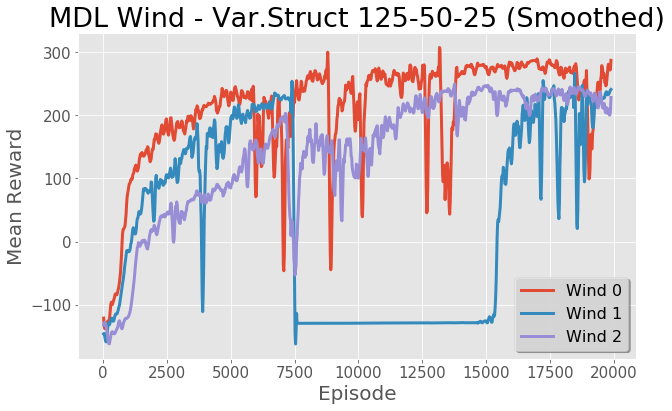

In [719]:
# Configure which experiment
# MTL 3 hid layers individually plotting each 0,1,2 for CASCADE MODEL (EXPERIMETNS WITH BATCH=20)

env_name = "BipedalWalker-v2"
task_name = "mdl_t012_cascade"
task_params = [0.0, 1.0, 2.0]
task_params_str = ''.join(str(e) +', ' for e in task_params)

# Depth 3: Cascade 125 50 25 and Cascade 125 50 125
cascade = "125-50-25" 
date_time = "Aug-08_06:49:03"

# cascade = "125-50-125" 
# date_time = "Aug-08_11:51:39"

# is_filtered = ""
is_filtered = " (Smoothed)"

path = "PPO_MTL/log-files/{}/{}/{}/{}".format(env_name, task_name,  task_params_str, date_time)
print(path)

# Read log files
# log_type = "log"
log_type = "aux"
log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
log_files = np.sort(log_files)
print(log_files)

df_tot = []
for log in log_files:
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))
    
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
min_num_episodes = 19900
# min_num_episodes = 12000
batch_size = df_tot[0]['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size    
print(num_episodes_tot)
print(num_rows)

# Configure plotting method
task_name = "MDL Wind" 
legend_names = ["Wind 0", "Wind 1","Wind 2"]
print(legend_names)
exp_name = task_name + " - Var.Struct {}".format(cascade) + is_filtered
file_name = "PPO_MTL/plots/MDL Cascade/{}_{}_{}.pdf".format(env_name, exp_name, date_time)
save = False


# Plot Data
# num_exp +=1
mean_R = np.zeros((num_exp, num_rows))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]


# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    mean_R = savgol_filter(mean_R, 13 , 4)  

ax_acc = plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)


Sync @ 6950
['Wind 0', 'Wind 1', 'Wind 2']
[ 233.76004692  189.4855176   183.67247467]
202.306013061

Cascade 125-50-25 @ 19900 ['Wind 0', 'Wind 1', 'Wind 2']
[ 271.26770904  235.89676999  208.11643777]
238.426972267

Cascade 125-50-125 @ 12000 ['Wind 0', 'Wind 1', 'Wind 2']
[ 261.71284044  242.83616786  275.45729103]
260.002099777

Best SDL on Each Domain [247.795 263.074 227.461] 246.110

In [720]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.mean(np.mean(mean_R[:, -1:-n-1:-1], axis=1)))

(3, 995)
200
['Wind 0', 'Wind 1', 'Wind 2']
[ 271.26770904  235.89676999  208.11643777]
238.426972267


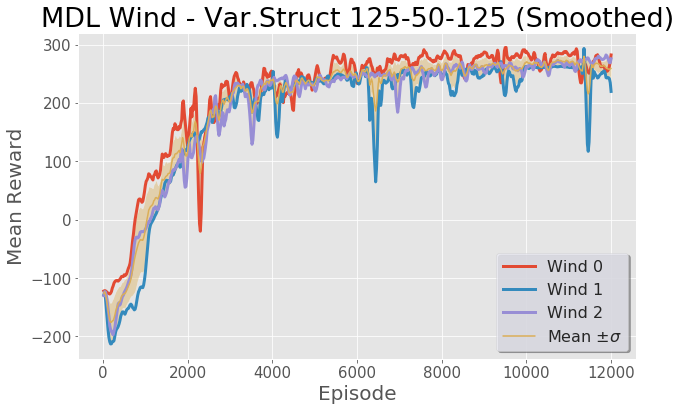

In [559]:
# add mean across all tasks + std*confidence_interval
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data
ax_acc = plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)
ax = ax_acc
x_data = np.arange(batch_size, min_num_episodes+1, batch_size) 
mean_of_mean_R = np.mean(mean_R, axis=0)
ci = 0.90 #confidence interval
std = np.std(mean_R, axis=0)*ci


# Plot Config
save = False
lfont = 16
clrs = sns.color_palette("hls", 10)
i = 1
with sns.axes_style("darkgrid"):    
    ax.plot(x_data, mean_of_mean_R, label= "Mean $\pm \sigma$", c=clrs[i],)
    ax.legend(loc=4, prop={'size':lfont}, ncol = 1, fancybox=True, shadow=True)
    ax.fill_between(x_data, mean_of_mean_R - std, mean_of_mean_R + std , alpha=0.4, facecolor=clrs[i])    
    
fig_acc = ax.get_figure()
if(save): # Save figures
    fig_acc.tight_layout()
    fig_acc.savefig(file_name) 

#### MDL vs SDL (MDL taken from the KL PPO_loss_mtl experiments)

PPO_MTL/log-files/BipedalWalker-v2/stl_t0/0.0, /Jul-24_21:07:38
['aux_stl_t0_0.0.txt']
PPO_MTL/log-files/BipedalWalker-v2/stl_t1/1.0, /Jul-24_22:09:08
['aux_stl_t1_1.0.txt']
PPO_MTL/log-files/BipedalWalker-v2/stl_t2/2.0, /Jul-24_22:13:26
['aux_stl_t2_2.0.txt']
PPO_MTL/log-files/BipedalWalker-v2/PPO_loss_mtl/0.0, 1.0, 2.0, /Jul-24_18:56:22
['aux_PPO_loss_mtl_0.0.txt' 'aux_PPO_loss_mtl_1.0.txt'
 'aux_PPO_loss_mtl_2.0.txt']
[11720, 12510, 10105, 6420]
6420
[1284, 1284, 1284, 321, 321, 321]
['SDL 0', 'SDL 1', 'SDL 2', 'MDL 0', 'MDL 1', 'MDL 2']


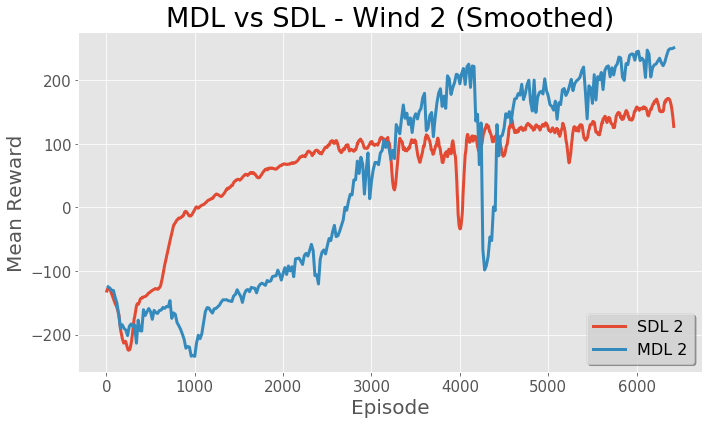

In [22]:
# Configure which experiment
# MDL vs SDL, but using the short MDL expermiment runned for the PPO loss

env_name = "BipedalWalker-v2"
tasks_names = ["stl_t0", "stl_t1", "stl_t2","PPO_loss_mtl"]
dates_times = ["Jul-24_21:07:38", "Jul-24_22:09:08", "Jul-24_22:13:26", "Jul-24_18:56:22"]
tasks_params = [[0.0], [1.0], [2.0], [0.0, 1.0, 2.0]]

is_filtered = ""
is_filtered = " (Smoothed)"

# Read log files
mean_R_all = []
min_num_episodes_all = []
batch_size_all = []
log_type = "aux"

for i in range(len(tasks_names)):
    task_params_str = ''.join(str(e) +', ' for e in tasks_params[i])
    path = "PPO_MTL/log-files/{}/{}/{}/{}".format(env_name, tasks_names[i],  task_params_str, dates_times[i])
    print(path)

    log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
    log_files = np.sort(log_files)
    print(log_files)

    df_tot = []
    for log in log_files:
        if log_type == "log":
            df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
        else:# if using auxiliary logs
            df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))
    
    # Get experiments properties
    num_exp = len(df_tot)
    num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
    min_num_episodes_all.append(min(num_episodes_tot))
    batch_size_all.append( [df_tot[0]['_Episode'].as_matrix()[0]] * num_exp )
    
    for i,df in enumerate(df_tot):
        mean_R_all.append(df['_MeanReward'].as_matrix())
        
batch_size_all = sum(batch_size_all, []) # make list of lists a single list 

# Get experiments properties
num_exp = len(mean_R_all)
min_num_episodes = min(min_num_episodes_all)
print(min_num_episodes_all)
print(min_num_episodes)

# Crop each data set depending on the relation between min_num_episodes and its  batch size
num_rows_all = []
for batch_size in batch_size_all: num_rows_all.append(min_num_episodes // batch_size)
print(num_rows_all)

# Configure plotting method 
is_filtered = ""
is_filtered = " (Smoothed)"

legend_names = ["SDL 0", "SDL 1", "SDL 2", "MDL 0", "MDL 1", "MDL 2"]
print(legend_names)

task_name = "MDL vs SDL"
legend_filter = ["All"]
legend_filter = ["2"]
exp_name = task_name + " - Wind {}".format(legend_filter[0]) + is_filtered 
file_name = "PPO_MTL/plots/MDL vs SDL/{}_{}_{}.pdf".format(env_name, exp_name, "Jul-24_23-xx")
save = True

# Plot Data
mean_R = np.zeros((num_exp, max(num_rows_all)))
for i in range(num_exp):
    mean_R[i,0:num_rows_all[i]] = mean_R_all[i][0:num_rows_all[i]]
    
# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    mean_R[0:3] = savgol_filter(mean_R[0:3], 35 , 4) 
    
plot_for_model_diff_bathches(mean_R, num_rows_all, min_num_episodes, batch_size_all, legend_names, exp_name, file_name=file_name, save=save, legend_filter=legend_filter)

#### MDL vs SDL (Good MDL, talen from the Batch=20 MDL experiments)

PPO_MTL/log-files/BipedalWalker-v2/sdl_t0_casc/0.0, /Aug-22_00:33:29
['aux_sdl_t0_casc_0.0.txt']
PPO_MTL/log-files/BipedalWalker-v2/stl_t1/1.0, /Jul-24_22:09:08
['aux_stl_t1_1.0.txt']
PPO_MTL/log-files/BipedalWalker-v2/sdl_t2_casc/2.0, /Aug-22_00:46:35
['aux_sdl_t2_casc_2.0.txt']
PPO_MTL/log-files/BipedalWalker-v2/mdl_t012_cascade/0.0, 1.0, 2.0, /Aug-08_11:51:39
['aux_mdl_t012_cascade_0.0.txt' 'aux_mdl_t012_cascade_1.0.txt'
 'aux_mdl_t012_cascade_2.0.txt']
[20000, 12510, 20000, 28160]
12000
['SDL 0', 'SDL 1', 'SDL 2', 'MDL 0', 'MDL 1', 'MDL 2']


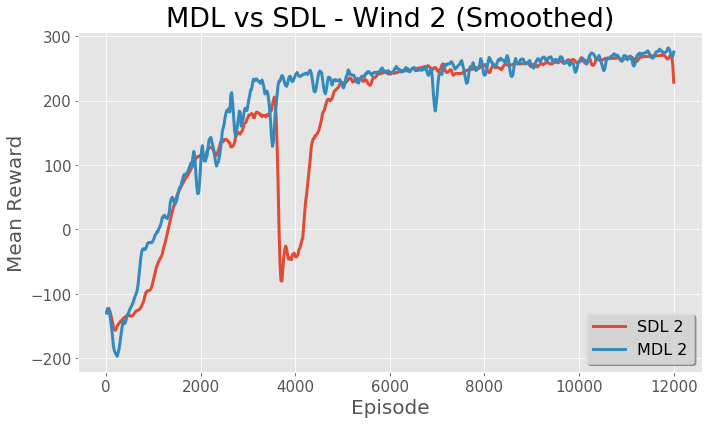

In [763]:
# Configure which experiment
# MTL vs STL

# Agents
env_name = "BipedalWalker-v2"
tasks_names = ["sdl_t0_casc", "stl_t1", "sdl_t2_casc","mdl_t012_cascade"]
dates_times = ["Aug-22_00:33:29", "Jul-24_22:09:08", "Aug-22_00:46:35", "Aug-08_11:51:39"]
tasks_params = [[0.0], [1.0], [2.0], [0.0, 1.0, 2.0]]

is_filtered = ""
is_filtered = " (Smoothed)"


# Read log files
mean_R_all = []
min_num_episodes_all = []
batch_size_all = []
log_type = "aux"

for i in range(len(tasks_names)):
    task_params_str = ''.join(str(e) +', ' for e in tasks_params[i])
    path = "PPO_MTL/log-files/{}/{}/{}/{}".format(env_name, tasks_names[i],  task_params_str, dates_times[i])
    print(path)

    log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
    log_files = np.sort(log_files)
    print(log_files)

    df_tot = []
    for log in log_files:
        if log_type == "log":
            df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
        else:# if using auxiliary logs
            df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))

    # Get experiments properties
    num_exp = len(df_tot)
    num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
    min_num_episodes_all.append(min(num_episodes_tot))
    batch_size_all.append( [df_tot[0]['_Episode'].as_matrix()[0]] * num_exp )

    for i,df in enumerate(df_tot):
        mean_R_all.append(df['_MeanReward'].as_matrix())
        
batch_size_all = sum(batch_size_all, []) # make list of lists a single list 


# Get experiments properties
num_exp = len(mean_R_all)
min_num_episodes = min(min_num_episodes_all)
min_num_episodes = 12000
print(min_num_episodes_all)
print(min_num_episodes)

# Crop each data set depending on the relation between min_num_episodes and its  batch size
num_rows_all = []
for batch_size in batch_size_all: num_rows_all.append(min_num_episodes // batch_size)
# print(num_rows_all)



# Configure plotting method 
legend_names = ["SDL 0", "SDL 1", "SDL 2", "MDL 0", "MDL 1", "MDL 2"]
print(legend_names)

task_name = "MDL vs SDL"
legend_filter = ["All"]
legend_filter = ["2"]
exp_name = task_name + " - Wind {}".format(legend_filter[0]) + is_filtered 
file_name = "PPO_MTL/plots/MDL vs SDL/{}_{}.pdf".format(env_name, exp_name)
save = True

# Plot Data
mean_R = np.zeros((num_exp, max(num_rows_all)))
for i in range(num_exp):
    mean_R[i,0:num_rows_all[i]] = mean_R_all[i][0:num_rows_all[i]]
    
# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    # Since mean_R might be full of filling zeros, need to apply filter per experiment
    for i in range(num_exp): 
        mean_R[i,0:num_rows_all[i]]  = savgol_filter(mean_R[i,0:num_rows_all[i]] , 13 , 4)  
    
plot_for_model_diff_bathches(mean_R, num_rows_all, min_num_episodes, batch_size_all, legend_names, exp_name, file_name=file_name, save=save, legend_filter=legend_filter)

In [764]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10 
for i,legend in enumerate(legend_names):
    if legend_filter[0] in legend:
        R_legend = mean_R[i,0:num_rows_all[i]]
        print(legend)
        print(np.mean(R_legend))
        print(np.mean(R_legend[-1:-n-1:-1]))
        
        

SDL 2
170.746741317
262.385424105
MDL 2
194.548278202
275.457291028


In [765]:
(275.457/262.385)*100

104.98199211082951

In [769]:
(261.712+242.836+275.457)/3

260.00166666666667

In [766]:
(261.712840441 + 242.836167861 + 275.457291028) / 3

260.0020997766667

#### MDL SGD (with time steps) 

PPO_MTL_sgd/log-files/BipedalWalker-v2/mdl_t012/0.0, 1.0, 2.0, /Aug-05_01:34:21
['aux_mdl_t012_0.0.txt' 'aux_mdl_t012_1.0.txt' 'aux_mdl_t012_2.0.txt']
[176128, 176128, 176128]
['Wind 0', 'Wind 1', 'Wind 2']


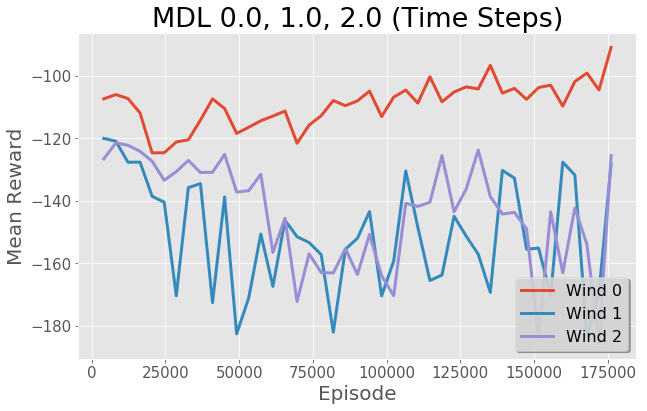

In [9]:
# Configure which experiment
# MTL kl or clip or both for 3 or 7 individually plotting each 0,1,2

env_name = "BipedalWalker-v2"
task_name = "mdl_t012"
task_params = [0.0, 1.0, 2.0]
task_params_str = ''.join(str(e) +', ' for e in task_params)
date_time = "Aug-05_01:34:21"
# Aug-05_01:34:21, Aug-05_01:52:08

path = "PPO_MTL_sgd/log-files/{}/{}/{}/{}".format(env_name, task_name,  task_params_str, date_time)
print(path)

# Read log files
# log_type = "log"
log_type = "aux"
log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
log_files = np.sort(log_files)
print(log_files)

df_tot = []
for log in log_files:
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))
    
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_TimeStep'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
batch_size = df_tot[0]['_TimeStep'].as_matrix()[0]
num_rows = min_num_episodes // batch_size    
print(num_episodes_tot)

# Configure plotting method
task_name = "MDL 0.0, 1.0, 2.0 (Time Steps)"
legend_names = ["Wind 0", "Wind 1","Wind 2"]
print(legend_names)

# exp_name = task_name + " - MDL - " + "{} loss for {} hid. layers".format(loss_type, num_hid) 
exp_name = task_name
file_name = "PPO_MTL_sgd/plots/PPO Loss/MDL individual 0,1,2, Plots/{}_{}_{}.pdf".format(env_name, exp_name, date_time)
if not os.path.exists(file_name): os.makedirs(file_name)
save = False


# Plot Data
mean_R = np.zeros((num_exp, num_rows))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]

plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)


### Lunar Lander Experiments 

#### **Plot multiple logs for STL Experiment (singles logs in single date_time folder)**

PPO_MTL/log-files/LunarEnv/stl_diff_R/Goal, NotGoal, Fly
['Aug-07_00:04:15' 'Aug-07_00:06:18' 'Aug-07_00:14:33']
['aux_stl_diff_R_LunarLanderFly-v2.txt', 'aux_stl_diff_R_LunarLanderNotGoal-v2.txt', 'aux_stl_diff_R_LunarLanderGoal-v2.txt']
[12720, 13820, 14340]
['Fly', 'Not Goal', 'Goal']
(3, 600)


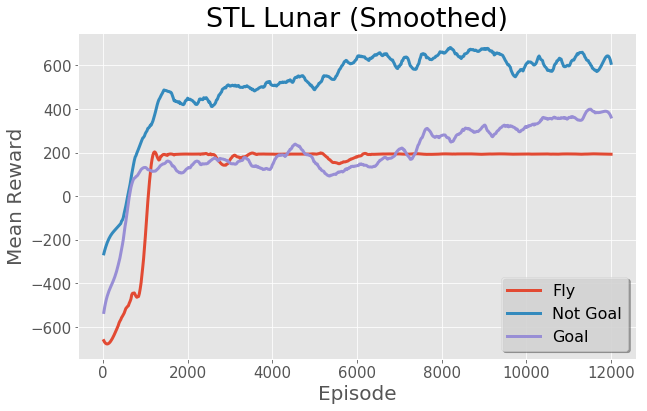

In [517]:
# Configure which experiment
# STL Lunar

env_name = "LunarEnv"
task_name = "stl_diff_R"
task_params = "Goal, NotGoal, Fly"
task_params_str = task_params

# Agents
date_time = "Aug-07_00:14:33"
# is_filtered = ""
is_filtered = " (Smoothed)"

path = "PPO_MTL/log-files/{}/{}/{}".format(env_name, task_name,  task_params_str)
print(path)

# Read log files
log_type = "aux" 
# log_type = "aux"
dir_names = np.sort(os.listdir(path))
print(dir_names)
log_files = [os.listdir(os.path.join(path, dir_name)) for dir_name in dir_names]
log_files = sum(log_files, []) # joint list of lists into single list
log_files = [file_name for file_name in log_files if "lock" not in file_name and log_type in file_name]
print(log_files)

df_tot = []
for dir_,log in zip(dir_names, log_files):
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, dir_, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, dir_, log), delim_whitespace=True))
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
min_num_episodes = 12000
batch_size = df_tot[0]['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size
print(num_episodes_tot)

# Configure plotting method
task_name = "{} Lunar".format("STL") 
legend_names = ["Fly", "Not Goal", "Goal"]
print(legend_names)
exp_name = task_name + is_filtered
file_name = "PPO_MTL/plots/STL Lunar/{}_{}_{}.pdf".format(env_name, exp_name, date_time)
save = False

# Plot Data
mean_R = np.zeros((num_exp, num_rows))
print(mean_R.shape)
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]

# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    mean_R = savgol_filter(mean_R, 35 , 4)  

plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)

STL @ 12000 ['Fly', 'Not Goal', 'Goal']
[ 192.44671833  631.49852225  382.74706769]
402.230769421
[ 203.05791314  681.92932446  398.83673329]

In [520]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.mean(mean_R, axis=1))
print(np.max(mean_R, axis=1))

(3, 600)
200
['Fly', 'Not Goal', 'Goal']
[ 192.44671833  631.49852225  382.74706769]
[ 127.2384432   518.79671377  192.89149555]
[ 203.05791314  681.92932446  398.83673329]


#### **Plot multiple logs for MTL Experiment (logs in single date_time folder)**

PPO_MTL/log-files/LunarEnv/mtl_diff_R/Goal, NotGoal, Fly/Aug-09_08:21:30
['aux_mtl_diff_R_LunarLanderFly-v2.txt'
 'aux_mtl_diff_R_LunarLanderGoal-v2.txt'
 'aux_mtl_diff_R_LunarLanderNotGoal-v2.txt']
[16540, 16540, 16540]
['Fly', 'Goal', 'Not Goal']


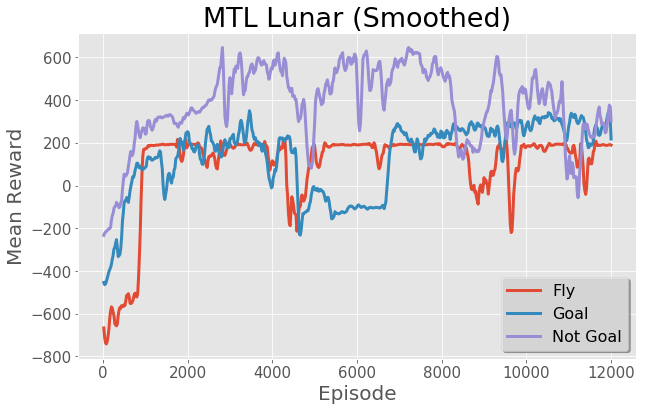

In [521]:
# Configure which experiment
# MTL 3 hid layers individually plotting each task

env_name = "LunarEnv"
task_name = "mtl_diff_R"
task_params = "Goal, NotGoal, Fly"
task_params_str = task_params

# Agents
mtl = "MTL" 
date_time = "Aug-09_08:21:30"

# mtl = "MTL [Async]" 
# date_time = "Aug-09_01:27:53"

# mtl = "125-50-25"
# date_time = "Aug-09_01:40:45"

# is_filtered = ""
is_filtered = " (Smoothed)"

path = "PPO_MTL/log-files/{}/{}/{}/{}".format(env_name, task_name,  task_params_str, date_time)
print(path)

# Read log files
# log_type = "log"
log_type = "aux"
log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
log_files = np.sort(log_files)
print(log_files)

df_tot = []
for log in log_files:
    if log_type == "log":
        df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
    else:# if using auxiliary logs
        df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))
    
    
# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
min_num_episodes = 12000 
batch_size = df_tot[0]['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size    
print(num_episodes_tot)

# Configure plotting method
task_name = "{} Lunar".format(mtl) 
legend_names = ["Fly", "Goal", "Not Goal"]
print(legend_names)
exp_name = task_name + is_filtered
file_name = "PPO_MTL/plots/MTL Lunar/{}_{}_{}.pdf".format(env_name, exp_name, date_time)
save = False


# Plot Data
# num_exp +=1
mean_R = np.zeros((num_exp, num_rows))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]


# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    mean_R = savgol_filter(mean_R, 13 , 4)  

ax_acc = plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)

STL @ 12000 ['Fly', 'Not Goal', 'Goal']
[ 192.44671833  631.49852225  382.74706769]
402.230769421
[ 203.05791314  681.92932446  398.83673329]

MTL @ >15000 ['Fly', 'Goal', 'Not Goal']
[ 178.865116    243.73171713  573.26738997]
331.954741036

MTL @ 12000 ['Fly', 'Goal', 'Not Goal']
[ 189.91159599  298.38823821  305.07072403]
264.456852743

MTL Cascade @ 17500 ['Fly', 'Goal', 'Not Goal']
[ 104.92473343  173.67562771  583.82524538]
287.475202173

MTL Cascade @ 5000 ['Fly', 'Goal', 'Not Goal']
[ 191.34328299  247.11892464  465.23597651]
301.232728046

In [524]:
# Compute Avg. Perofrmance on Last n- episodes
n = 10
print(mean_R.shape)
print(n*batch_size)
print(legend_names)
print(np.mean(mean_R[:, -1:-n-1:-1], axis=1))
print(np.mean(mean_R, axis=1))
print(np.mean(np.mean(mean_R[:, -1:-n-1:-1], axis=1)))

(3, 600)
200
['Fly', 'Goal', 'Not Goal']
[ 189.91159599  298.38823821  305.07072403]
[  93.73161968  134.4959485   377.90800419]
264.456852743


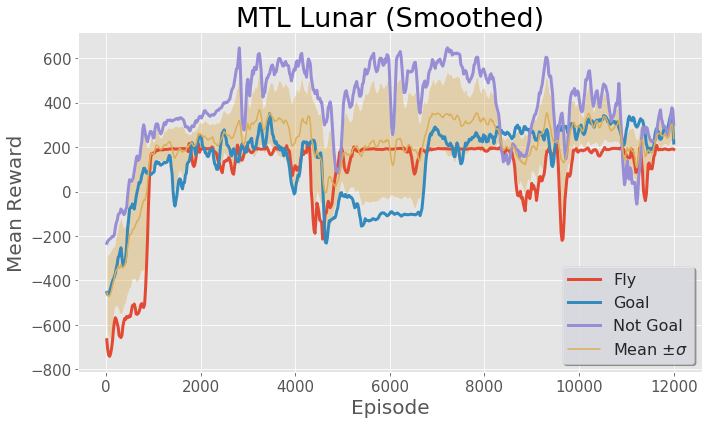

In [452]:
# add mean across all tasks + std*confidence_interval
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data
ax_acc = plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)
ax = ax_acc
x_data = np.arange(batch_size, min_num_episodes+1, batch_size) 
mean_of_mean_R = np.mean(mean_R, axis=0)
ci = 0.90 #confidence interval
std = np.std(mean_R, axis=0)*ci


# Plot Config
save = True
lfont = 16
clrs = sns.color_palette("hls", 10)
i = 1
with sns.axes_style("darkgrid"):    
    ax.plot(x_data, mean_of_mean_R, label= "Mean $\pm \sigma$", c=clrs[i],)
    ax.legend(loc=4, prop={'size':lfont}, ncol = 1, fancybox=True, shadow=True)
    ax.fill_between(x_data, mean_of_mean_R - std, mean_of_mean_R + std , alpha=0.4, facecolor=clrs[i])    
    
fig_acc = ax.get_figure()
if(save): # Save figures
    fig_acc.tight_layout()
    fig_acc.savefig(file_name) 

#### MTL vs STL 

PPO_MTL/log-files/LunarEnv/stl_diff_R/Goal, NotGoal, Fly/Aug-07_00:14:33
['aux_stl_diff_R_LunarLanderGoal-v2.txt']
PPO_MTL/log-files/LunarEnv/stl_diff_R/Goal, NotGoal, Fly/Aug-07_00:06:18
['aux_stl_diff_R_LunarLanderNotGoal-v2.txt']
PPO_MTL/log-files/LunarEnv/stl_diff_R/Goal, NotGoal, Fly/Aug-07_00:04:15
['aux_stl_diff_R_LunarLanderFly-v2.txt']
PPO_MTL/log-files/LunarEnv/mtl_diff_R/Goal, NotGoal, Fly/Aug-09_08:21:30
['aux_mtl_diff_R_LunarLanderFly-v2.txt'
 'aux_mtl_diff_R_LunarLanderGoal-v2.txt'
 'aux_mtl_diff_R_LunarLanderNotGoal-v2.txt']
[14340, 13820, 12720, 16540]
12000
[600, 600, 600, 600, 600, 600]
['STL Goal', 'STL Not', 'STL Fly', 'MTL Fly', 'MTL Goal', 'MTL Not']


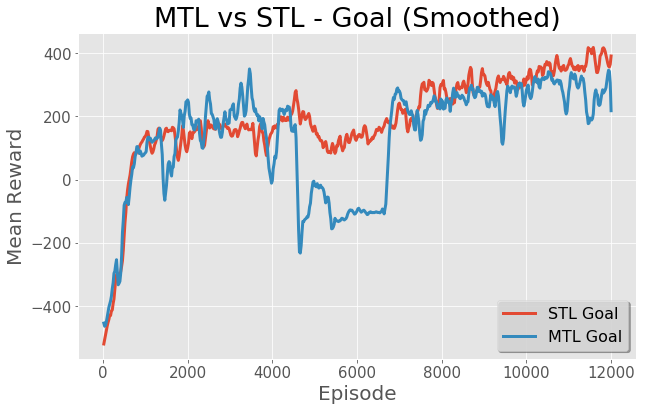

In [622]:
# Configure which experiment
# MTL vs STL

# Agents
env_name = "LunarEnv"
tasks_names = ["stl_diff_R","mtl_diff_R"]
task_params = "Goal, NotGoal, Fly"
dates_times = [["Aug-07_00:14:33","Aug-07_00:06:18", "Aug-07_00:04:15"], ["Aug-09_08:21:30"]]

# stl = "STL Goal"
# date_time = "Aug-07_00:14:33"

# stl = "STL Not Goal" 
# date_time = "Aug-07_00:06:18"

# stl = "STL Fly" 
# date_time = "Aug-07_00:04:15"

is_filtered = ""
is_filtered = " (Smoothed)"

# Read log files
mean_R_all = []
min_num_episodes_all = []
batch_size_all = []
log_type = "aux"

for i in range(len(tasks_names)):
    
    for date_time in dates_times[i]:

        path = "PPO_MTL/log-files/{}/{}/{}/{}".format(env_name, tasks_names[i],  task_params, date_time)
        print(path)

        log_files = [file_name for file_name in os.listdir(path) if "lock" not in file_name and log_type in file_name]
        log_files = np.sort(log_files)
        print(log_files)

        df_tot = []
        for log in log_files:
            if log_type == "log":
                df_tot.append(pd.read_csv(os.path.join(path, log), sep=',',header=0))
            else:# if using auxiliary logs
                df_tot.append(pd.read_table(os.path.join(path, log), delim_whitespace=True))

        # Get experiments properties
        num_exp = len(df_tot)
        num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
        min_num_episodes_all.append(min(num_episodes_tot))
        batch_size_all.append( [df_tot[0]['_Episode'].as_matrix()[0]] * num_exp )

        for i,df in enumerate(df_tot):
            mean_R_all.append(df['_MeanReward'].as_matrix())
        
batch_size_all = sum(batch_size_all, []) # make list of lists a single list 

# Get experiments properties
num_exp = len(mean_R_all)
min_num_episodes = min(min_num_episodes_all)
min_num_episodes = 12000
print(min_num_episodes_all)
print(min_num_episodes)

# Crop each data set depending on the relation between min_num_episodes and its  batch size
num_rows_all = []
for batch_size in batch_size_all: num_rows_all.append(min_num_episodes // batch_size)
print(num_rows_all)


# Configure plotting method 
is_filtered = ""
is_filtered = " (Smoothed)"

legend_names = ["STL Goal", "STL Not Goal", "STL Fly", "MTL Fly", "MTL Goal", "MTL Not Goal"]
legend_names = ["STL Goal", "STL Not", "STL Fly", "MTL Fly", "MTL Goal", "MTL Not"]
print(legend_names)

target_task = "Goal"
task_name = "MTL vs STL"
legend_filter = [target_task]
# legend_filter = ["Goal"]
exp_name = task_name + " - {}".format(target_task) + is_filtered 
file_name = "PPO_MTL/plots/MTL vs STL/{}_{}.pdf".format(env_name, exp_name)
save = False

# Plot Data
mean_R = np.zeros((num_exp, max(num_rows_all)))
for i in range(num_exp):
    mean_R[i,0:num_rows_all[i]] = mean_R_all[i][0:num_rows_all[i]]
    
# Smoothing signal
if is_filtered:
    from scipy.signal import savgol_filter
    # Since mean_R might be full of filling zeros, need to apply filter per experiment
    for i in range(num_exp): 
        mean_R[i,0:num_rows_all[i]]  = savgol_filter(mean_R[i,0:num_rows_all[i]] , 13 , 4)  
    
    
plot_for_model_diff_bathches(mean_R, num_rows_all, min_num_episodes, batch_size_all, legend_names, exp_name, file_name=file_name, save=save, legend_filter=legend_filter)

#### Lunar Lander Reward Functions 

In [314]:
# Curve Fitting
import numpy as np
from scipy.optimize import curve_fit

# define order of function
def func(x, a, b, c, d, e):
    return a + b*x +c*x**2 + d*x**3 + e*x**4

# Define input/ouput data and fit
xdata = np.array([0,0.875,-0.875,1,-1])
ydata = np.array([-300,30,30,-50,-50])
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

# Evaluate a point
x_star = 0.90
print(func(x_star, popt[0], popt[1], popt[2], popt[3],popt[4]))

[ -3.00000000e+02  -8.01489819e-06   1.02235374e+03   8.84517911e-06
  -7.72353741e+02]
21.3652400511


/home/david/Downloads/[/home/david/Programs/anaconda3]/envs/mtrl/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [324]:
# Get Data
x_data = []
y_data = []
x = np.arange(-1,1,0.001)

# Goal
y = -150*np.abs(x)
x_data.append(x)
y_data.append(y.flatten())

# Not Goal
y = func(x, popt[0], popt[1], popt[2], popt[3],popt[4])
x_data.append(x)
y_data.append(y)

# Fly X
y = 2.5*(+ 27.61266 - 2.581069e-15*x - 103.0681*x**2)
x_data.append(x)
y_data.append(y)

# Config
legend_names = ["\"Goal\" Penalty","\"Not Goal\" Penalty", "\"Fly\" $X_{pos}$ Penalty"]
xlabel = "$X_{pos}$"
ylabel = 'Penalty Value'
file_name = "./lunar_reward_func_x_pos.pdf"
save = True

In [326]:
# Get Data
x_data = []
y_data = []
x = np.arange(0,1,0.001)

# Fly Y
y = 5*(- 100 - 28.33333*x + 685*x**2 - 616.6667*x**3)
x_data.append(x)
y_data.append(y)

# Config
legend_names = ["\"Fly\" $Y_{pos}$ Penalty"]
xlabel = 'Penalty Value'
ylabel = "$Y_{pos}$"
file_name = "./lunar_reward_func_y_pos.pdf"
save = True

SAVE


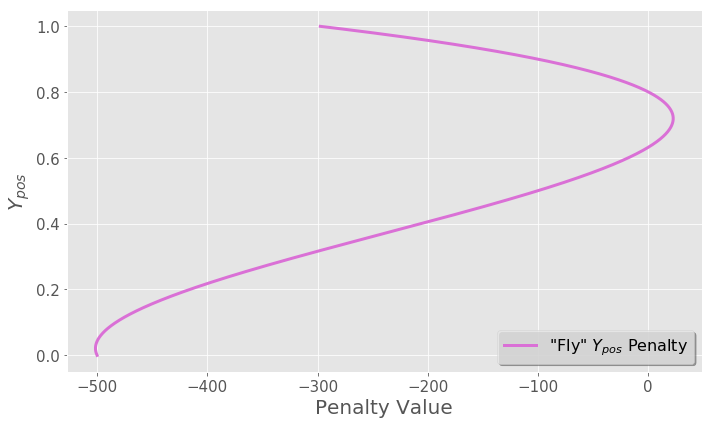

In [327]:
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.style.use('ggplot')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

# Config axis and plots them

fig_acc= plt.figure() # Create Figures
ax_acc = fig_acc.add_subplot(111)
lw = 3 # line width
ls = '-'
for i in range(len(x_data)):
    # For X Penalty
    if "Penalty" not in xlabel:
        ax_acc.plot(x_data[i], y_data[i], label = legend_names[i], lw=lw, ls=ls)
    
    # For Y penalty
    else:
        ax_acc.plot(y_data[i], x_data[i], label = legend_names[i], lw=lw, ls=ls, c = 'orchid')


# Configure Axis Propertiesa
lfont = 16
ax_acc.legend(loc=4, prop={'size':lfont}, ncol = 1, fancybox=True, shadow=True)
ax_acc.set_xlabel(xlabel,fontsize=20 )
ax_acc.set_ylabel(ylabel, fontsize=20)
# ax_acc.set_title("{}".format(exp_name),fontsize=27)#, fontweight='bold')
ax_acc.tick_params(labelsize=15)

if(save): # Save figures
    print("SAVE")
    fig_acc.tight_layout()
    fig_acc.savefig(file_name)

In [ ]:
\
            + 5*(- 100 - 28.33333*state[1] + 685*state[1]**2 - 616.6667*state[1]**3) 

### PPO Clipping Plots

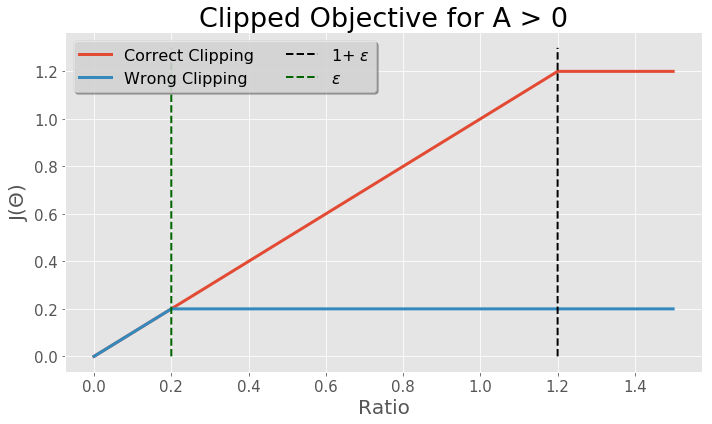

In [36]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.style.use('ggplot')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

# Create Figures
fig_ppo= plt.figure()
ax_ppo = fig_ppo.add_subplot(111)

# General Setting
save = True
file_name = "ppo_clipped_objective_A_positive"
exp_name = "Clipped Objective for A > 0"
ep = 0.2
A = 1
lw = 3 # line width
ls = '-'

# Get y and x data   
x_data = np.arange(0,1.5,0.001)
x_clip_good = np.clip(x_data, 1-ep, 1+ep)
x_clip_bad = np.clip(x_data, 0, ep)
y_good = np.minimum(x_data*A, x_clip_good*A)
y_bad = np.minimum(x_data*A, x_clip_bad*A)
ax_ppo.plot(x_data, y_good, label = "Correct Clipping", lw=lw, ls=ls)
ax_ppo.plot(x_data, y_bad, label = "Wrong Clipping", lw=lw, ls=ls)
ax_ppo.plot([1+ep]*x_data.shape[0], np.arange(0,1.3,(1.3)/x_data.shape[0]),label = "1+ $\epsilon$", lw=lw-1, ls="--", c = "black")
ax_ppo.plot([ep]*x_data.shape[0], np.arange(0,1.3,(1.3)/x_data.shape[0]),label = "$\epsilon$", lw=lw-1, ls="--", c = "darkgreen")

# Configure Axis Propertiesa
lfont = 16
ax_ppo.legend(loc=2, prop={'size':lfont}, ncol = 2, fancybox=True, shadow=True)
ax_ppo.set_xlabel('Ratio',fontsize=20 )
ax_ppo.set_ylabel("J($\Theta$)", fontsize=20)
ax_ppo.set_title("{}".format(exp_name),fontsize=27)#, fontweight='bold')
ax_ppo.tick_params(labelsize=15)


if(save): # Save figures
    fig_ppo.tight_layout()
    fig_ppo.savefig(file_name) 

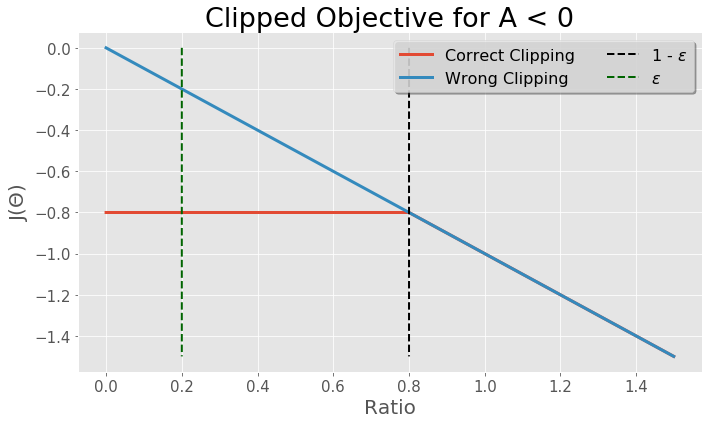

In [39]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.style.use('ggplot')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

# Create Figures
fig_ppo= plt.figure()
ax_ppo = fig_ppo.add_subplot(111)

# General Setting
save = True
file_name = "ppo_clipped_objective_A_negative"
exp_name = "Clipped Objective for A < 0"
ep = 0.2
A = -1
lw = 3 # line width
ls = '-'

# Get y and x data   
x_data = np.arange(0,1.5,0.001)
x_clip_good = np.clip(x_data, 1-ep, 1+ep)
x_clip_bad = np.clip(x_data, 0, ep)
y_good = np.minimum(x_data*A, x_clip_good*A)
y_bad = np.minimum(x_data*A, x_clip_bad*A)
ax_ppo.plot(x_data, y_good, label = "Correct Clipping", lw=lw, ls=ls)
ax_ppo.plot(x_data, y_bad, label = "Wrong Clipping", lw=lw, ls=ls)
ax_ppo.plot([1-ep]*x_data.shape[0], np.arange(0,-1.5,(-1.5)/x_data.shape[0]),label = "1 - $\epsilon$", lw=lw-1, ls="--", c = "black")
ax_ppo.plot([ep]*x_data.shape[0], np.arange(0,-1.5,(-1.5)/x_data.shape[0]),label = "$\epsilon$", lw=lw-1, ls="--", c = "darkgreen")

# Configure Axis Propertiesa
lfont = 16
ax_ppo.legend(loc=1, prop={'size':lfont}, ncol = 2, fancybox=True, shadow=True)
ax_ppo.set_xlabel('Ratio',fontsize=20 )
ax_ppo.set_ylabel("J($\Theta$)", fontsize=20)
ax_ppo.set_title("{}".format(exp_name),fontsize=27)#, fontweight='bold')
ax_ppo.tick_params(labelsize=15)


if(save): # Save figures
    fig_ppo.tight_layout()
    fig_ppo.savefig(file_name) 

### Draw a NN 

In [9]:
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.style.use('ggplot')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

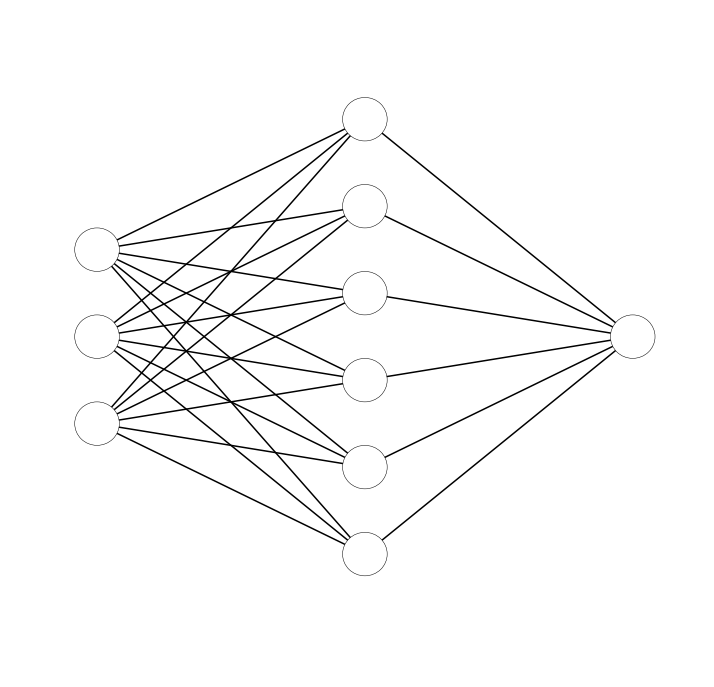

In [16]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
input_dim = 3
hidden_dim = 6
output_dim = 1
draw_neural_net(ax, .1, .9, .1, .9, [input_dim, hidden_dim, output_dim])
fig.savefig('nn_scheme.pdf')

### Other 

In [115]:
# Load CSV data
df_1 = pd.read_csv('fine00_2000.csv', sep=',',header=0)
df_2 = pd.read_csv('fine10_5000.csv', sep=',',header=0)
df_3 = pd.read_csv('fine86_10000.csv', sep=',',header=0)
df_tot = [df_1, df_2, df_3]
# df_tot = [df_2]

# Configure plotting method
legend_names =["2000 Iters","5000 Iters", "10000 Iters"]
# legend_names =["loss"]#,"5000 Iters", "10000 Iters"]
exp_name = "G and D losses for various Iterations"
# exp_name = "G vs D Warm up stage"
# file_name =| "G_D_iters.pdf"
save = True

# Get experiments properties
num_exp = len(df_tot)
num_epochs_tot = [df.shape[0] for df in df_tot]
max_num_epochs = max(num_epochs_tot)
crop_iter = [2000, 5000, 10000]
# crop_iter = [150]

# Get Validation Accuracy for each experiment
g_loss = np.zeros((num_exp, max_num_epochs))
d_loss = np.zeros((num_exp, max_num_epochs))
for i,df in enumerate(df_tot):
    g_loss[i,0:crop_iter[i]] = df['generator_loss'].as_matrix()[0:crop_iter[i]]
    d_loss[i,0:crop_iter[i]] = df['discriminator_loss'].as_matrix()[0:crop_iter[i]] 
g_loss /= np.max(np.abs(g_loss))
d_loss /= np.max(np.abs(d_loss))
print(g_loss.shape)
print(d_loss.shape)

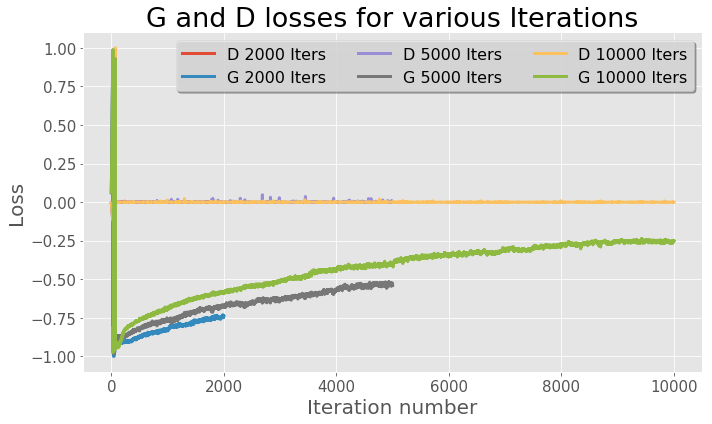

In [117]:
# Plot Data
plot_for_model(g_loss, d_loss, crop_iter, legend_names, exp_name, file_name=file_name, save=save)

In [ ]:
min_num_epochs = min(num_epochs_tot)

# Get Validation Accuracy for each experiment
acc_val = np.zeros((num_exp, min_num_epochs))
for i,df in enumerate(df_tot):
    acc_val[i,:] = df['val_c_accuracy_tot'].as_matrix()[0:min_num_epochs]    
    
# Plot Data
num_epochs = min_num_epochs
plot_for_model(acc_val, num_epochs, legend_names, exp_name, file_name=file_name, save=save)

#### Loss Func Experiments

In [32]:
# Load CSV data
os.chdir('/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/classification_logs/Loss exp.')
df_1 = pd.read_csv('3D_3S_classW_loss.csv', sep=',',header=0)
df_2 = pd.read_csv('3D_3S_accW_loss_2.csv', sep=',',header=0)
df_3 = pd.read_csv('3D_3S_FirstOne_loss.csv', sep=',',header=0)
df_tot = [df_1, df_2, df_3]

# Configure plotting method
legend_names =["Class Normed Loss","Acc. Weighted Loss", "One-task-first Loss"]
exp_name = "Multi-output Loss Func."
file_name = ["/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/saved_im/loss_val_acc.pdf" ]
save = True

####  Regularization Experiments

In [174]:
%autoreload
# Load CSV data
os.chdir('/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/classification_logs/Regularization exp.')
df_1 = pd.read_csv('L2_0.01_drop_0.csv', sep=',',header=0)
df_2 = pd.read_csv('L2_0.01_drop_1.csv', sep=',',header=0)
df_3 = pd.read_csv('L2_0.01_drop_2.csv', sep=',',header=0)
df_4 = pd.read_csv('L2_0.001_drop_0.csv', sep=',',header=0)
df_5 = pd.read_csv('L2_0.001_drop_1.csv', sep=',',header=0)
df_6 = pd.read_csv('L2_0.001_drop_2.csv', sep=',',header=0)
df_7 = pd.read_csv('L2_0.0001_drop_0.csv', sep=',',header=0)
df_8 = pd.read_csv('L2_0.0001_drop_1.csv', sep=',',header=0)
df_9 = pd.read_csv('L2_0.0001_drop_2.csv', sep=',',header=0)
df_10 = pd.read_csv('3D_3S_classW_loss.csv', sep=',',header=0)
df_tot = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]

# Configure plotting method
legend_names =["L2=0.01, D=0","L2=0.01, D=1", "L2=0.01, D=2",\
               "L2=0.001, D=0","L2=0.001, D=1","L2=0.001, D=2",\
               "L2=0.0001, D=0", "L2=0.0001, D=1","L2=0.0001, D=2",\
               "L2=0.0, D=2"]
exp_name = "Regularization Methods"
file_name = ["/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/saved_im/regu_val_acc_FINAL.pdf" ]
save = True

#### Batch Norm. Experiments 

In [184]:
%autoreload
# Load CSV data
os.chdir('/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/classification_logs/BN exp.')

df_1 = pd.read_csv('BN_0.csv', sep=',',header=0)
df_2 = pd.read_csv('BN_1.csv', sep=',',header=0)
df_3 = pd.read_csv('BN_2.csv', sep=',',header=0)
df_tot = [df_1, df_2, df_3] 

# Configure plotting method
legend_names =["BN=0", "BN=1", "BN=2"]
exp_name = "Batch Normalization Methods"
file_name = ["/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/saved_im/BN_val_acc.pdf" ]
save = True

#### Run Plotting Code 

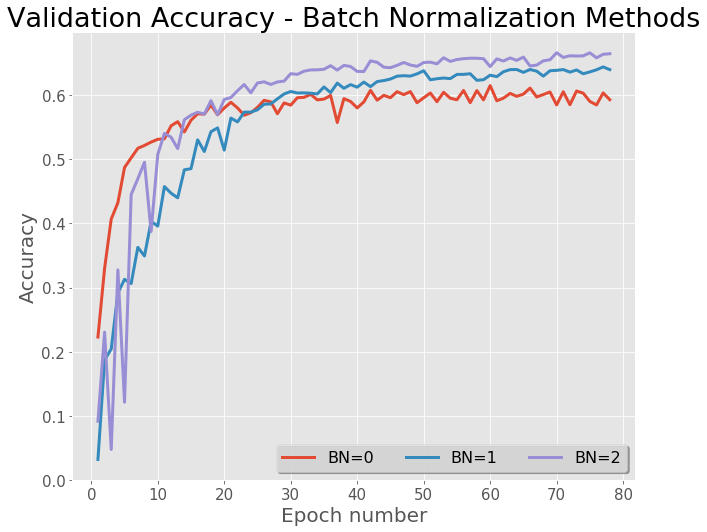

In [187]:
# Get experiments properties
num_exp = len(df_tot)
num_epochs_tot = [df.shape[0] for df in df_tot]
min_num_epochs = min(num_epochs_tot)

# Get Validation Accuracy for each experiment
acc_val = np.zeros((num_exp, min_num_epochs))
for i,df in enumerate(df_tot):
    acc_val[i,:] = df['val_c_accuracy_tot'].as_matrix()[0:min_num_epochs]    
    
# Plot Data
num_epochs = min_num_epochs
plot_for_model(acc_val, num_epochs, legend_names, exp_name, file_name=file_name, save=save)